## Andrew Morris INST 414

In [8]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('Affordable_Housing_by_Town_2011-2022.csv')

In [6]:
df.head(5)

,Year,Town Code,Town,2010 Census Units,Government Assisted,Tenant Rental Assistance,Single Family CHFA/ USDA Mortgages,Deed Restricted Units,Total Assisted Units,Percent Affordable
0,2020,1,Andover,1317,18.0,1,32,0,51,3.87
1,2020,2,Ansonia,8148,349.0,764,147,0,1260,15.46
2,2020,3,Ashford,1903,32.0,0,36,0,68,3.57
3,2020,4,Avon,7389,244.0,16,44,0,304,4.11
4,2020,5,Barkhamsted,1589,0.0,6,23,0,29,1.83


In [14]:
# Fill missing values with mean of each column
df.fillna(df.mean(), inplace=True)

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

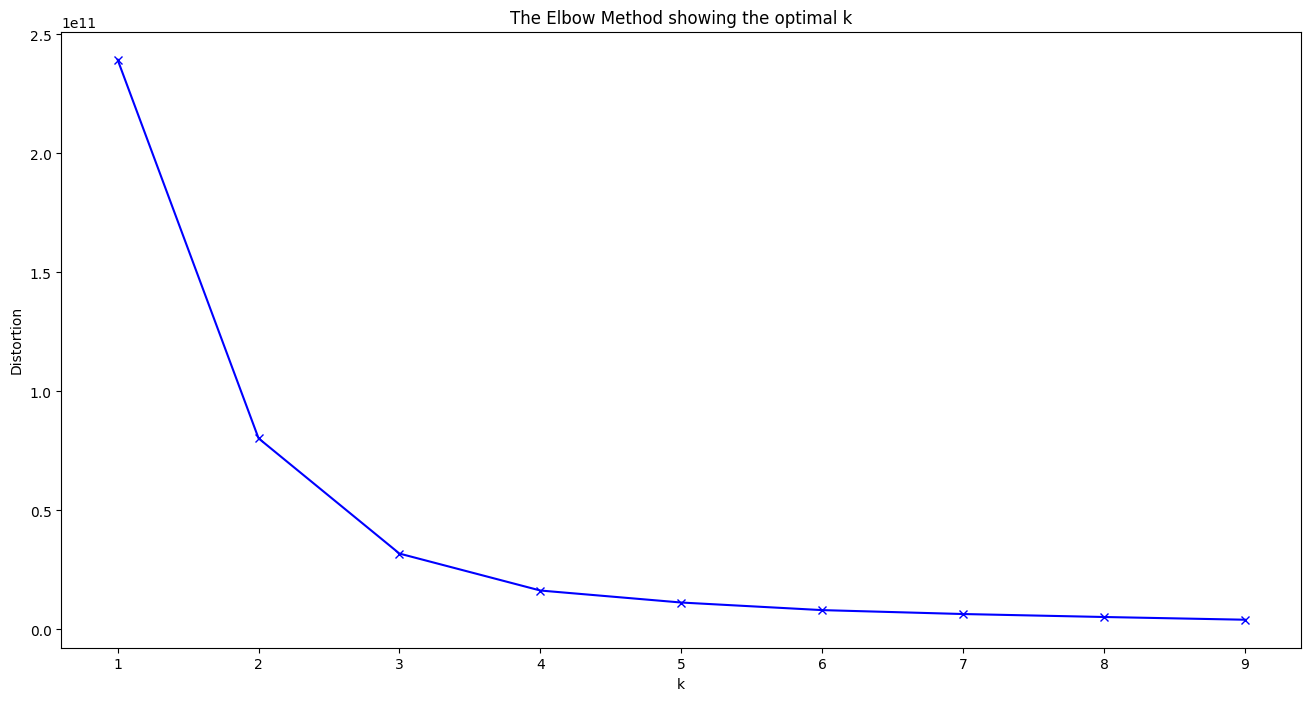

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [30]:
# Elbow Method for K means
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

k = 3

kmeans = KMeans(n_clusters=k)
kmeans_labels = kmeans.fit_predict(df)


agg_clustering = AgglomerativeClustering(n_clusters=k)
agg_labels = agg_clustering.fit_predict(df)

df['KMeans_labels'] = kmeans_labels
df['Agglomerative_labels'] = agg_labels

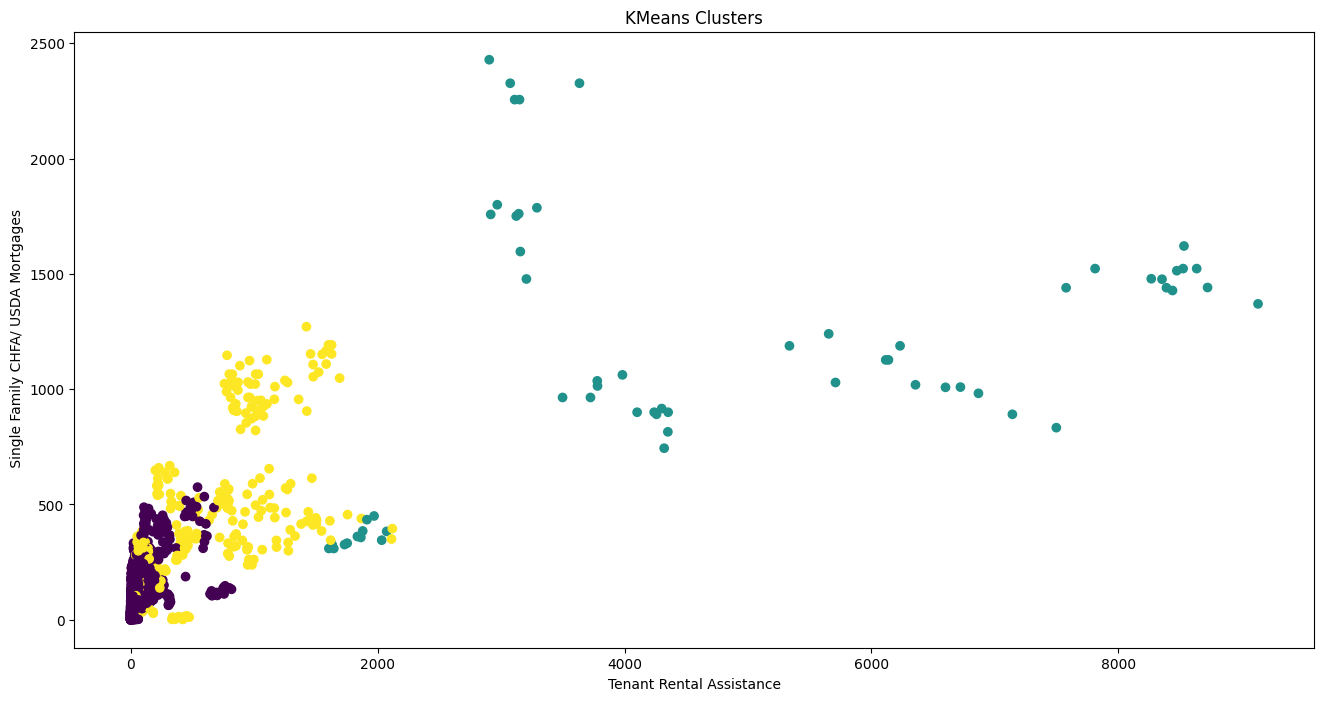

In [31]:
x_axis = df.columns[5]  
y_axis = df.columns[6]  


plt.figure(figsize=(16,8))
plt.scatter(df[x_axis], df[y_axis], c=df['KMeans_labels'], cmap='viridis')
plt.title('KMeans Clusters')
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.show()
